In [248]:
import numpy as np
from statistics import mode
from astropy.io import fits
from astropy import units as u
from astropy import coordinates as coord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr
from BootstrapCorrelation import korr, korr2
from astropy.io import ascii

In [70]:
filename1 = '../DS9/rxj1713_hess_rebin.fits'
hdu1 = fits.open(filename1)
y_data = hdu1[0].data
y_header = hdu1[0].header

filename2 = '../DS9/mopra_HI_regrid.fits'
hdu2 = fits.open(filename2)
x_data = hdu2[0].data
x_header = hdu2[0].header

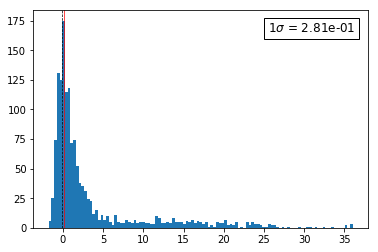

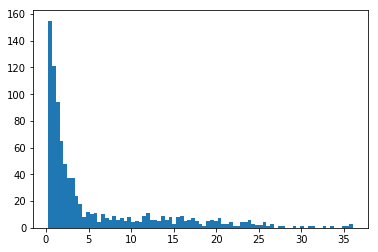

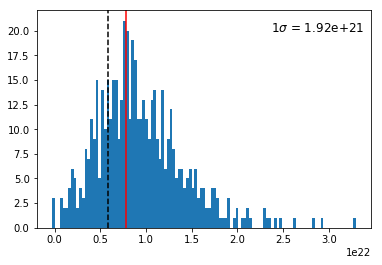

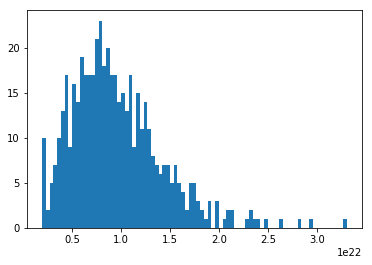

In [67]:

Np_mop_data = x_data[~np.isnan(x_data)]
gamma_data = y_data[~np.isnan(y_data)]


gamma_round = [round(i, 2) for i in gamma_data.flatten()]
gamma_normal = [i for i in gamma_data if i <= np.percentile(gamma_data, 68.26)]
sigma_g = mode(gamma_round) - np.percentile(gamma_normal, 68.26/2)
Np_round = [round(i/1e21, 1) for i in Np_mop_data.flatten()]
Np_normal = [i for i in Np_mop_data if i <= np.percentile(Np_mop_data, 68.26)]
sigma_N = mode(Np_round)*1e21 - np.percentile(Np_normal, 68.26/2)

gamma_data2 = [i for i in gamma_data if i >= sigma_g]
Np_mop_data2 = [i for i in Np_mop_data if i >= sigma_N]


#use range option in plt.hist when you have nan in your data
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(gamma_data, bins=111)
plt.axvline(mode(gamma_round), color = 'r', ls = "-", linewidth='0.7')
# plt.axvline(np.percentile(gamma_normal,50), color = 'g', ls = "-", linewidth='0.7')
plt.axvline(np.percentile(gamma_normal,68.26/2.0), color = 'k', ls = "--", linewidth='0.7')
plt.text(0.7, 0.9, '1$\sigma$ = {:1.2e}'.format(sigma_g), size=12, transform=ax.transAxes, bbox=dict(facecolor='white'))
plt.show()
plt.hist(gamma_data2, bins=81)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(Np_mop_data, bins=111)
plt.axvline(mode(Np_round)*1e21, color = 'r', ls = "-")
plt.axvline(np.percentile(Np_normal,68.26/2.0), color = 'k', ls = "--")
plt.text(0.7, 0.9, '1$\sigma$ = {:1.2e}'.format(sigma_N), size=12, transform=ax.transAxes)
plt.show()
plt.hist(Np_mop_data2, bins=81) 
plt.show()


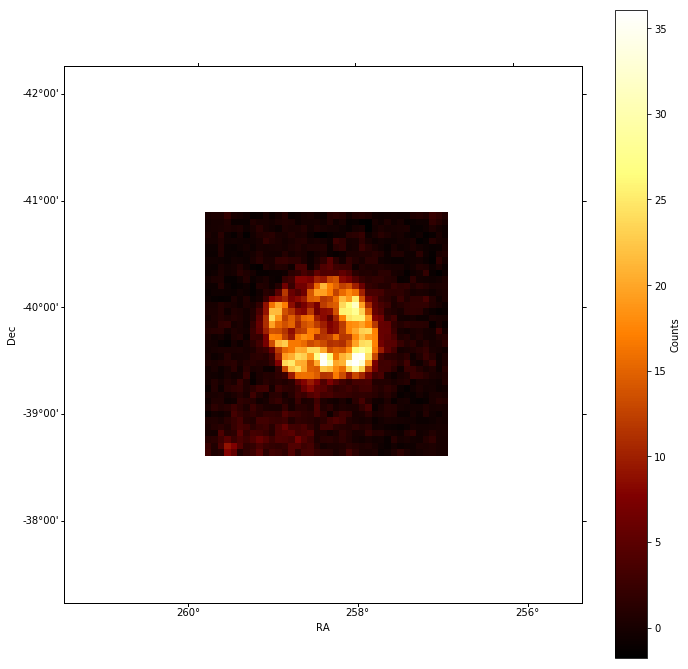

In [72]:
fig = plt.figure(figsize=(9,9))

wcs = WCS(y_header)
ax = WCSAxes(fig, [0,0,1,1], wcs=wcs)
fig.add_axes(ax)

plt.imshow(y_data, cmap=cm.afmhot) #vlim is limiting the colourbar range

cb = plt.colorbar()
cb.set_label('Counts')

# ax.scatter(258.4457, -39.2666, transform=ax.get_transform('fk5'), s=300, edgecolor='white', facecolor='none')
# r = Rectangle((258.4457, -39.2666), -0.18, -0.18, edgecolor='white', facecolor='none', transform=ax.get_transform('fk5'))
# ax.add_patch(r)

plt.xlabel('RA')
plt.ylabel('Dec')

#plt.tight_layout()
# plt.savefig('test.eps', bbox_inches='tight')

In [124]:
# order the fits data for each region according to ascending region number
x = []
y = []

x.append(x_data[47:50,34:37].flatten())
x.append(x_data[47:50,37:40].flatten())
x.append(x_data[47:50,40:43].flatten())
x.append(x_data[47:50,43:46].flatten())

x.append(x_data[44:47,31:34].flatten())
x.append(x_data[44:47,34:37].flatten())
x.append(x_data[44:47,37:40].flatten())
x.append(x_data[44:47,40:43].flatten())
x.append(x_data[44:47,43:46].flatten())
x.append(x_data[44:47,46:49].flatten())

x.append(x_data[41:44,31:34].flatten())
x.append(x_data[41:44,34:37].flatten())
x.append(x_data[41:44,37:40].flatten())
x.append(x_data[41:44,40:43].flatten())
x.append(x_data[41:44,43:46].flatten())
x.append(x_data[41:44,46:49].flatten())

x.append(x_data[38:41,31:34].flatten())
x.append(x_data[38:41,34:37].flatten())
x.append(x_data[38:41,37:40].flatten())
x.append(x_data[38:41,40:43].flatten())
x.append(x_data[38:41,43:46].flatten())
x.append(x_data[38:41,46:49].flatten())

x.append(x_data[35:38,31:34].flatten())
x.append(x_data[35:38,34:37].flatten())
x.append(x_data[35:38,37:40].flatten())
x.append(x_data[35:38,40:43].flatten())
x.append(x_data[35:38,43:46].flatten())

x.append(x_data[32:35,37:40].flatten())
x.append(x_data[32:35,40:43].flatten())


y.append(y_data[47:50,34:37].flatten())
y.append(y_data[47:50,37:40].flatten())
y.append(y_data[47:50,40:43].flatten())
y.append(y_data[47:50,43:46].flatten())

y.append(y_data[44:47,31:34].flatten())
y.append(y_data[44:47,34:37].flatten())
y.append(y_data[44:47,37:40].flatten())
y.append(y_data[44:47,40:43].flatten())
y.append(y_data[44:47,43:46].flatten())
y.append(y_data[44:47,46:49].flatten())

y.append(y_data[41:44,31:34].flatten())
y.append(y_data[41:44,34:37].flatten())
y.append(y_data[41:44,37:40].flatten())
y.append(y_data[41:44,40:43].flatten())
y.append(y_data[41:44,43:46].flatten())
y.append(y_data[41:44,46:49].flatten())

y.append(y_data[38:41,31:34].flatten())
y.append(y_data[38:41,34:37].flatten())
y.append(y_data[38:41,37:40].flatten())
y.append(y_data[38:41,40:43].flatten())
y.append(y_data[38:41,43:46].flatten())
y.append(y_data[38:41,46:49].flatten())

y.append(y_data[35:38,31:34].flatten())
y.append(y_data[35:38,34:37].flatten())
y.append(y_data[35:38,37:40].flatten())
y.append(y_data[35:38,40:43].flatten())
y.append(y_data[35:38,43:46].flatten())

y.append(y_data[32:35,37:40].flatten())
y.append(y_data[32:35,40:43].flatten())

# remove x-ray points with nan or noisey and corresponding Np data points
# n = len(x[0])
# for i in range(29):
#     k = 0
#     for j in range(n):
#         if np.isfinite(y[i][k]) == False or y[i][k] < sigma_g or x[i][k] < sigma_N:
#             y[i] = np.delete(y[i], k, axis=0)
#             x[i] = np.delete(x[i], k, axis=0)
#             k = k - 1
#         k = k + 1

In [189]:
#calculate the error for the individual data sets
# Trms might need updating for mopra
x_error = []
y_error = []
for i in range(len(x)):
    x_error.append([])
    y_error.append([])
    for j in range(len(x[i])):
        x_error[i].append(2. * 2.e20 * 1./np.sqrt(51.84) * 1.5 * np.sqrt(20.0/0.11) + 1.6 * np.sqrt(20.0/0.82) * 1.828e18 * 1/np.sqrt(51.84))
        y_error[i].append(np.sqrt(y[i][j]))


array([12.999088 , 22.144205 , 24.18895  ,  2.5571604,  9.563282 ,
       15.669847 ,  0.5941928,  1.4432241,  5.406552 ], dtype=float32)

In [169]:
# The korr function randomly redistributes each data point assuming the data point is normally distributed
# with its actual value as the mean ands its error as the std
# The korr2 function finds the pvalue distribution of a data-set

k = []
kk = []
for i in range(len(x)):
    print(i)
    k.append([])
    kk.append([])
    for j in range(100000):
        k[i].append(korr(x[i],y[i],x_error[i],y_error[i]))
        kk[i].append(korr2(np.mean(x[i]/1.e21), np.std(x[i]/1.e21), np.mean(y[i]), np.std(y[i]), len(x[i])))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


------------------
1
Actual value 0.5228669
Extreme value (3 sigma uncertainty) 0.07582901419798312 0.7786027102805939
3 sigma 0.8627367561119182
5 sigma 0.9734356866867695


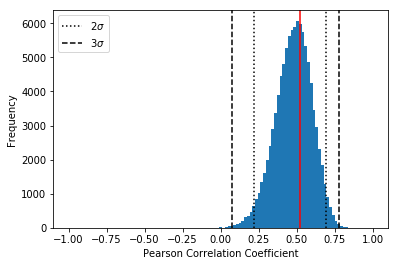

------------------
2
Actual value -0.28618756
Extreme value (3 sigma uncertainty) -0.8596037241834501 0.634878281077993
3 sigma 0.8632485792273373
5 sigma 0.9757724912473816


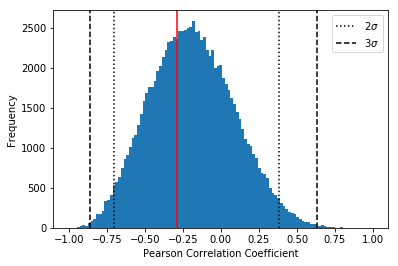

------------------
3
Actual value -0.7101351
Extreme value (3 sigma uncertainty) -0.91456973782036 -0.08205645648812844
3 sigma 0.8605905581502405
5 sigma 0.9703031591972647


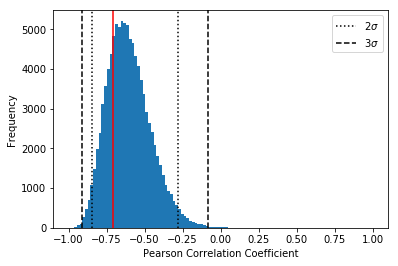

------------------
4
Actual value 0.8048476
Extreme value (3 sigma uncertainty) 0.3279275315123794 0.952634413366555
3 sigma 0.8605148238578199
5 sigma 0.9808416222828089


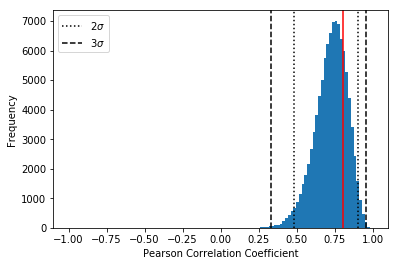

------------------
5
Actual value 0.09288296
Extreme value (3 sigma uncertainty) -0.5958624812597608 0.6326391107840155
3 sigma 0.8617723553314717
5 sigma 0.9695050667675157


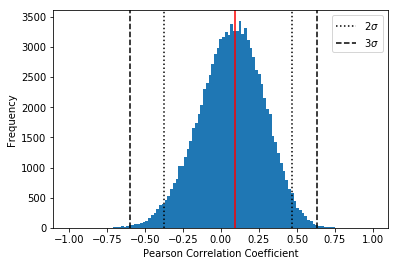

------------------
6
Actual value -0.0016254893
Extreme value (3 sigma uncertainty) -0.8200193744043783 0.8071416747342987
3 sigma 0.8667904379709253
5 sigma 0.9690251907975005


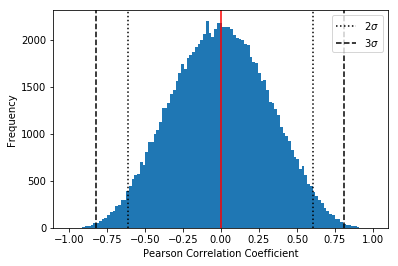

------------------
7
Actual value 0.006510126
Extreme value (3 sigma uncertainty) -0.7939153570304086 0.797644010240942
3 sigma 0.8702474328768458
5 sigma 0.9752932166775453


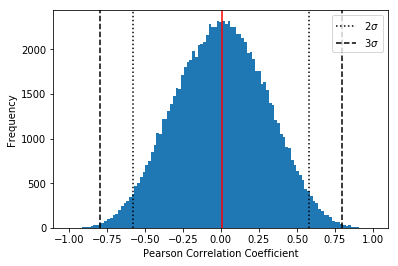

------------------
8
Actual value 0.017373038
Extreme value (3 sigma uncertainty) -0.6155701184035178 0.6488722922389855
3 sigma 0.8660569015817641
5 sigma 0.9818305155329535


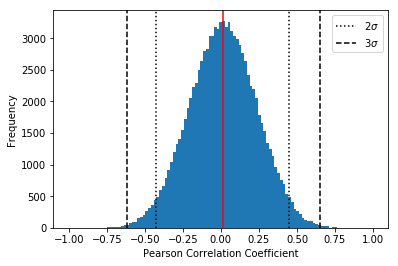

------------------
9
Actual value 0.3847089
Extreme value (3 sigma uncertainty) -0.3103093066812074 0.8183790405091009
3 sigma 0.8602722440108398
5 sigma 0.97051899221741


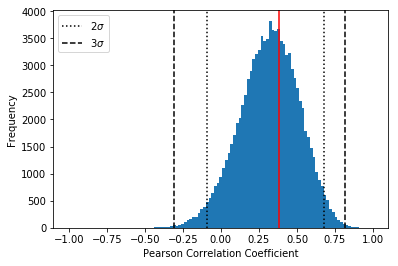

------------------
10
Actual value 0.11463127
Extreme value (3 sigma uncertainty) -0.43804414231527317 0.6161701624938729
3 sigma 0.8675862267544274
5 sigma 0.9847376980944019


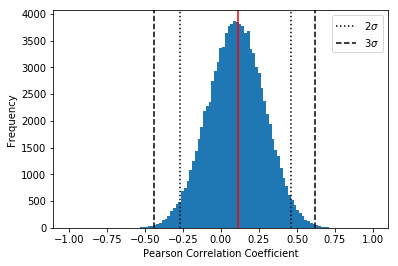

------------------
11
Actual value -0.043316454
Extreme value (3 sigma uncertainty) -0.7358250401309809 0.6982473656190663
3 sigma 0.8660059189295509
5 sigma 0.9820692471471308


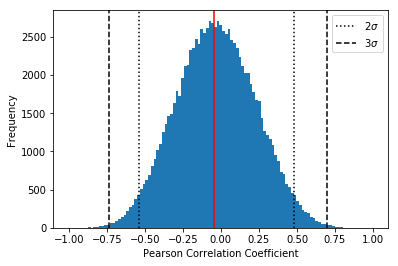

------------------
12
Actual value 0.5373077
Extreme value (3 sigma uncertainty) -0.46866843613541337 0.8973249313160065
3 sigma 0.8671541683584553
5 sigma 0.9702620085138043


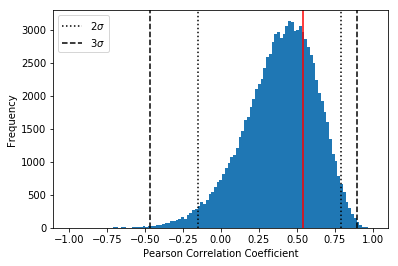

------------------
13
Actual value -0.016860565
Extreme value (3 sigma uncertainty) -0.8213174480140836 0.8264161415075708
3 sigma 0.8658398583535394
5 sigma 0.9703537210183307


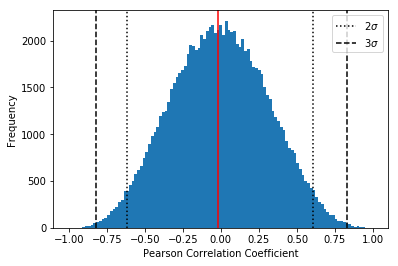

------------------
14
Actual value -0.7440468
Extreme value (3 sigma uncertainty) -0.9282773885456209 0.6288769986557299
3 sigma 0.8619246461562026
5 sigma 0.9766173750588547


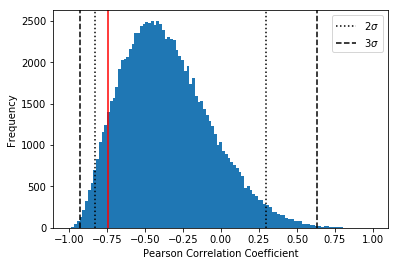

------------------
15
Actual value 0.34388497
Extreme value (3 sigma uncertainty) -0.7005615456877946 0.8712618326170387
3 sigma 0.860823151978269
5 sigma 0.9710319870811998


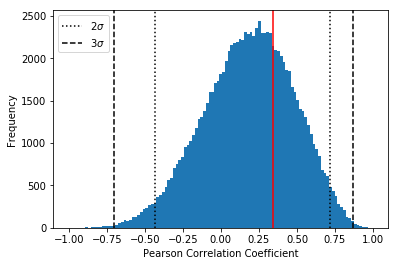

------------------
16
Actual value 0.8023799
Extreme value (3 sigma uncertainty) -0.5765744107497274 0.930789951126901
3 sigma 0.8627184085685814
5 sigma 0.9695201617972821


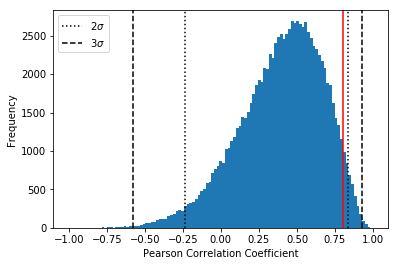

------------------
17
Actual value -0.10949938
Extreme value (3 sigma uncertainty) -0.8012544496928223 0.7317871425995384
3 sigma 0.8631145596003397
5 sigma 0.9706070426882275


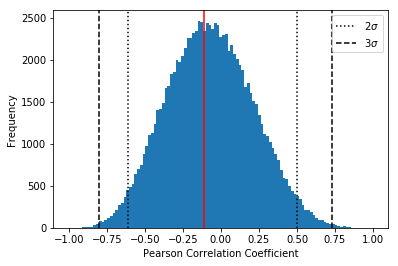

------------------
18
Actual value 0.5588251
Extreme value (3 sigma uncertainty) -0.6941144651001422 0.9035065685949444
3 sigma 0.8612614126696689
5 sigma 0.9638502764266268


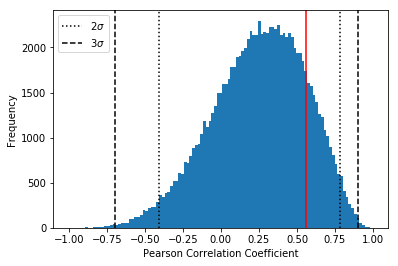

------------------
19
Actual value 0.12624954
Extreme value (3 sigma uncertainty) -0.7807315415709846 0.8320202933147391
3 sigma 0.8606945158883322
5 sigma 0.9756698077738089


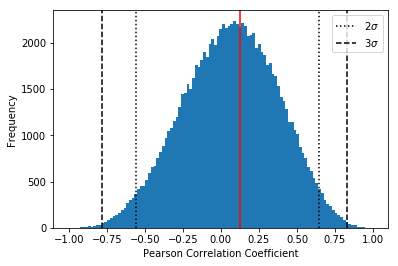

------------------
20
Actual value 0.015040416
Extreme value (3 sigma uncertainty) -0.810807282810276 0.7927301204135893
3 sigma 0.864866727810227
5 sigma 0.9875286164672716


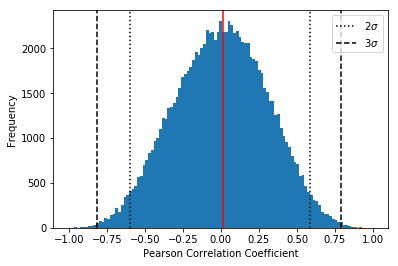

------------------
21
Actual value 0.48891798
Extreme value (3 sigma uncertainty) -0.39518472138274546 0.8774185754032537
3 sigma 0.8670985059950654
5 sigma 0.9797117539017816


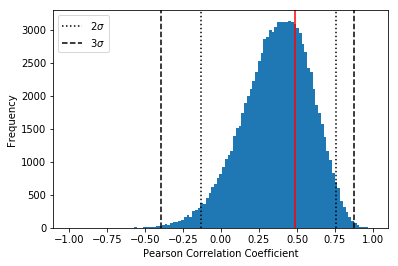

------------------
22
Actual value 0.43999612
Extreme value (3 sigma uncertainty) -0.2777423688108482 0.8659872283715943
3 sigma 0.8639482286142695
5 sigma 0.9801812485430722


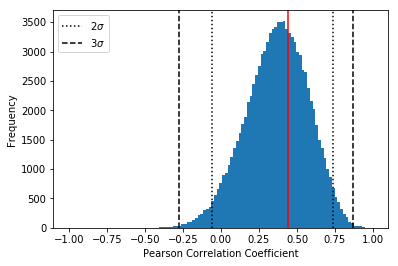

------------------
23
Actual value -0.61809236
Extreme value (3 sigma uncertainty) -0.8708567236741447 0.006412495526908601
3 sigma 0.8634864748085153
5 sigma 0.9688346315545115


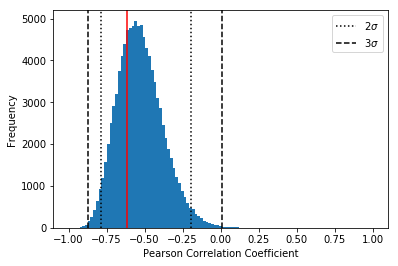

------------------
24
Actual value -0.25113332
Extreme value (3 sigma uncertainty) -0.8317019928400615 0.5903447530994659
3 sigma 0.8619819746925598
5 sigma 0.97756562642325


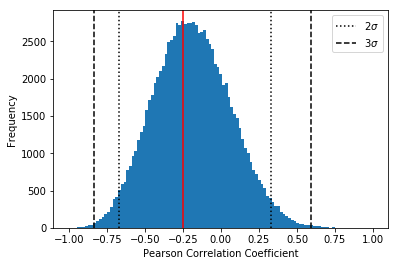

------------------
25
Actual value 0.11545038
Extreme value (3 sigma uncertainty) -0.7172064844972474 0.7720151329004661
3 sigma 0.8656971794304554
5 sigma 0.9749441827157425


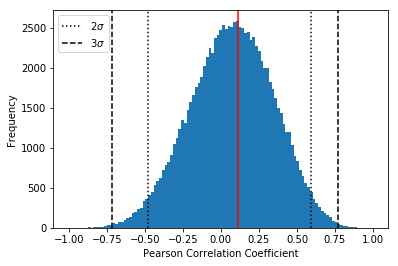

------------------
26
Actual value -0.015075377
Extreme value (3 sigma uncertainty) -0.8193153745268288 0.8273864003113545
3 sigma 0.8623948093411842
5 sigma 0.9719762108646296


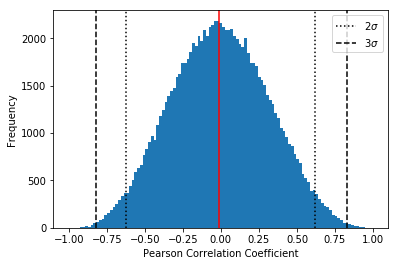

------------------
27
Actual value 0.2363297
Extreme value (3 sigma uncertainty) -0.6136103241185676 0.8001140448508275
3 sigma 0.8618443488407482
5 sigma 0.9667894047959955


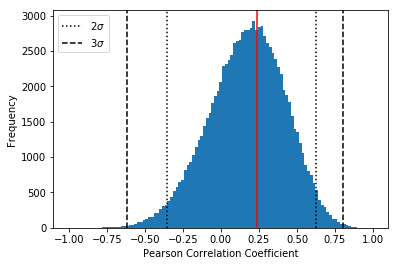

------------------
28
Actual value 0.03866744
Extreme value (3 sigma uncertainty) -0.7527844578513944 0.7079500475059591
3 sigma 0.8609041593465869
5 sigma 0.9803910767100092


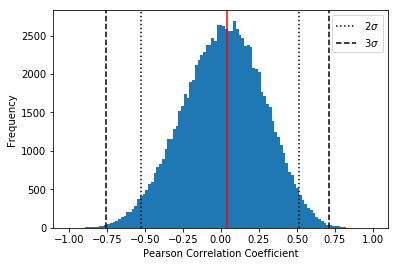

------------------
29
Actual value -0.4007479
Extreme value (3 sigma uncertainty) -0.8503946276793021 0.36898186972805086
3 sigma 0.8624950281157941
5 sigma 0.972308993720791


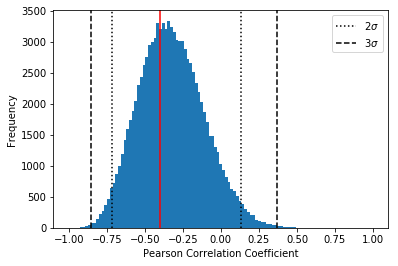

In [286]:
# Plot distribution of possible pearson values and display where 1sigma and 2sigma error is

for i in range(len(x)):
    print('------------------')
    print(i+1)
    print('Actual value', pearsonr(x[i]/1.e21,y[i])[0])
    print('Extreme value (3 sigma uncertainty)', np.percentile(k[i], (100-99.73)/2.0), np.percentile(k[i], 100 - (100 - 99.73)/2.0))
    print('3 sigma', np.percentile(np.abs(kk[i]), 99.73))
    print('5 sigma', np.percentile(np.abs(kk[i]), 99.99994))
    plt.hist(k[i], bins=111, range=[-1,1])
#     plt.axvline(np.percentile(k[i], (100-68.26)/2.0), color ='k', ls='--', label = '1$\sigma$')
#     plt.axvline(np.percentile(k[i], 100 - (100-68.26)/2.0), color ='k', ls='--')
    plt.axvline(np.percentile(k[i], (100-95.45)/2.0), color ='k', ls=':', label = '2$\sigma$')
    plt.axvline(np.percentile(k[i], 100 - (100-95.45)/2.0), color ='k', ls=':')
    plt.axvline(np.percentile(k[i], (100-99.73)/2.0), color ='k', ls='--', label = '3$\sigma$')
    plt.axvline(np.percentile(k[i], 100 - (100-99.73)/2.0), color ='k', ls='--')
    plt.axvline(pearsonr(x[i]/1.e21,y[i])[0], color = 'red', ls = "-")
    plt.legend(loc='best')
    plt.xlabel("Pearson Correlation Coefficient")
    plt.ylabel("Frequency")
    plt.savefig("correlation_study_data/bootstrap_dist/gammopHI_reg{}.ps".format(i+1), bbox_inches='tight', pad_inches=0.06)
    plt.show()
    
 
    

In [293]:
pearson_opt = []
opt_sig = []
for i in range(29):
    if pearsonr(x[i]/1.e21,y[i])[0] > 0:
        pearson_opt.append(np.percentile(k[i], 100 - (100 - 99.73)/2.0))
    else:
        pearson_opt.append(np.percentile(k[i], (100 - 99.73)/2.0))
    
    if np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 99.99994):
        opt_sig.append("5 sigma")
    elif np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 99.9937):
        opt_sig.append("4 sigma")
    elif np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 99.73):
        opt_sig.append("3 sigma")
    elif np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 95.49):
        opt_sig.append("2 sigma")
    elif np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 68.26):
        opt_sig.append("1 sigma")
    else:
        opt_sig.append("<1 sigma")
    
   
    print("{} {:.2f} {:.2f} {}".format(i+1, pearsonr(x[i]/1.e21,y[i])[0], pearson_opt[i], opt_sig[i]))

1 0.52 0.78 2 sigma
2 -0.29 -0.86 2 sigma
3 -0.71 -0.91 3 sigma
4 0.80 0.95 4 sigma
5 0.09 0.63 1 sigma
6 -0.00 -0.82 2 sigma
7 0.01 0.80 2 sigma
8 0.02 0.65 1 sigma
9 0.38 0.82 2 sigma
10 0.11 0.62 1 sigma
11 -0.04 -0.74 2 sigma
12 0.54 0.90 3 sigma
13 -0.02 -0.82 2 sigma
14 -0.74 -0.93 3 sigma
15 0.34 0.87 3 sigma
16 0.80 0.93 3 sigma
17 -0.11 -0.80 2 sigma
18 0.56 0.90 3 sigma
19 0.13 0.83 2 sigma
20 0.02 0.79 2 sigma
21 0.49 0.88 3 sigma
22 0.44 0.87 3 sigma
23 -0.62 -0.87 3 sigma
24 -0.25 -0.83 2 sigma
25 0.12 0.77 2 sigma
26 -0.02 -0.82 2 sigma
27 0.24 0.80 2 sigma
28 0.04 0.71 2 sigma
29 -0.40 -0.85 2 sigma


In [278]:
hdu = fits.open('fitsfiles/rxj1713_pearson_suz_mHI.fits')
image_data = hdu[0].data
image_header = hdu[0].header

for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        if image_data[i][j] == -10:
            image_data[i][j] = np.nan

reg = []
for i in range(29):
    reg.append(pearsonr(x[i]/1.e21,y[i])[0])
#     reg.append(pearson_opt[i])

In [279]:
image_data[6][2] = reg[0]
image_data[6][3] = reg[1]
image_data[6][4] = reg[2]
image_data[6][5] = reg[3]

image_data[5][1] = reg[4]
image_data[5][2] = reg[5]
image_data[5][3] = reg[6]
image_data[5][4] = reg[7]
image_data[5][5] = reg[8]
image_data[5][6] = reg[9]

image_data[4][1] = reg[10]
image_data[4][2] = reg[11]
image_data[4][3] = reg[12]
image_data[4][4] = reg[13]
image_data[4][5] = reg[14]
image_data[4][6] = reg[15]

image_data[3][1] = reg[16]
image_data[3][2] = reg[17]
image_data[3][3] = reg[18]
image_data[3][4] = reg[19]
image_data[3][5] = reg[20]
image_data[3][6] = reg[21]

image_data[2][1] = reg[22]
image_data[2][2] = reg[23]
image_data[2][3] = reg[24]
image_data[2][4] = reg[25]
image_data[2][5] = reg[26]

image_data[1][3] = reg[27]
image_data[1][4] = reg[28]

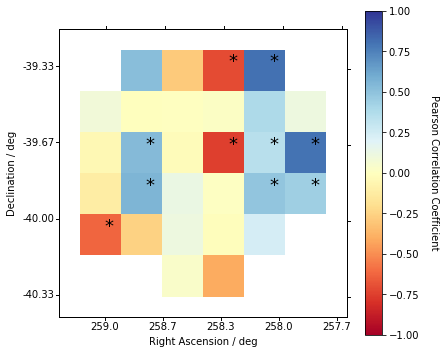

In [284]:
fig = plt.figure(figsize=(5,4.5))


wcs = WCS(image_header)
ax = WCSAxes(fig, [0,0,1,1], wcs= wcs)
fig.add_axes(ax)

ra = ax.coords['ra']
dec = ax.coords['dec']

#format axes
ra.set_major_formatter('d.d')
dec.set_major_formatter('d.dd')

plt.xlabel('Right Ascension / deg')
plt.ylabel('Declination / deg')

plt.imshow(image_data, cmap=plt.cm.RdYlBu, vmin =-1, vmax = 1, rasterized=True)
cbar = plt.colorbar()
cbar.set_label('Pearson Correlation Coefficient', rotation=270, labelpad=20)

plt.xlim(0,7)
plt.ylim(0,7) #flip y-axis

#Regions with an optimistic pearson value with significance > 3sigma 
plt.text(4.1,6.07,'*',fontsize=18)
plt.text(5.1,6.07,'*',fontsize=18)
plt.text(2.1,4.07,'*',fontsize=18)
plt.text(4.1,4.07,'*',fontsize=18)
plt.text(5.1,4.07,'*',fontsize=18)
plt.text(6.1,4.07,'*',fontsize=18)
plt.text(2.1,3.07,'*',fontsize=18)
plt.text(5.1,3.07,'*',fontsize=18)
plt.text(6.1,3.07,'*',fontsize=18)
plt.text(1.1,2.07,'*',fontsize=18)

plt.savefig('correlation_study_data/output/pearsonmap_gam_mopHI.ps', bbox_inches='tight', pad_inches=0.06)

plt.show()

In [127]:
r = []
p = []
sig2 = []
sig3 = []
for i in range(29):
    r.append(pearsonr(x[i]/1.e21,y[i])[0]) #Divide by factor of 1e21 to avoid overflow factor
    p.append(pearsonr(x[i]/1.e21,y[i])[1])
    if p[i] <(100 - 99.73)/100: #see if 3sigma confident
        sig3.append("Yes")
    else:
        sig3.append("No")
    if p[i] <(100 - 95.44)/100:
        sig2.append("Yes")
    else:
        sig2.append("No")
    print("reg.{}: r = {:.2f}, p = {:.4f}, 2sig={}".format(i+1,r[i],p[i],sig2[i]))
    
    label = "r = {:.2f}, p = {:.4f}".format(r[i],p[i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.errorbar(x[i], y[i], xerr = x_error[i], yerr = y_error[i], fmt = "o")
    plt.text(0.1,0.9,label, transform=ax.transAxes, bbox=dict(facecolor='white', alpha = 0.7))
    plt.xlabel("$N_p$ Column Density (cm$^{-2}$)")
    plt.ylabel("X-ray Excess Counts")
    plt.title("Region {:d}".format(i+1))
    plt.savefig("correlation_study_data/plots2/suzakuNR_mHI_2_reg" + str(i+1) + ".pdf")
    plt.close()

reg.1: r = 0.52, p = 0.1486, 2sig=No
reg.2: r = -0.29, p = 0.4553, 2sig=No
reg.3: r = -0.71, p = 0.0321, 2sig=Yes
reg.4: r = 0.80, p = 0.0089, 2sig=Yes
reg.5: r = 0.09, p = 0.8121, 2sig=No
reg.6: r = -0.00, p = 0.9967, 2sig=No
reg.7: r = 0.01, p = 0.9867, 2sig=No
reg.8: r = 0.02, p = 0.9646, 2sig=No
reg.9: r = 0.38, p = 0.3066, 2sig=No
reg.10: r = 0.11, p = 0.7690, 2sig=No
reg.11: r = -0.04, p = 0.9119, 2sig=No
reg.12: r = 0.54, p = 0.1357, 2sig=No
reg.13: r = -0.02, p = 0.9657, 2sig=No
reg.14: r = -0.74, p = 0.0215, 2sig=Yes
reg.15: r = 0.34, p = 0.3649, 2sig=No
reg.16: r = 0.80, p = 0.0093, 2sig=Yes
reg.17: r = -0.11, p = 0.7791, 2sig=No
reg.18: r = 0.56, p = 0.1178, 2sig=No
reg.19: r = 0.13, p = 0.7462, 2sig=No
reg.20: r = 0.02, p = 0.9694, 2sig=No
reg.21: r = 0.49, p = 0.1817, 2sig=No
reg.22: r = 0.44, p = 0.2360, 2sig=No
reg.23: r = -0.62, p = 0.0761, 2sig=No
reg.24: r = -0.25, p = 0.5145, 2sig=No
reg.25: r = 0.12, p = 0.7674, 2sig=No
reg.26: r = -0.02, p = 0.9693, 2sig=No
reg.27:

In [497]:
#write results to an output file
odata = np.vstack((r,p,sig))
odata = np.transpose(odata)
ofile = "correlation_study_data/output/suzaku_mopHI.txt"
ascii.write(odata,ofile, names= ["PCC", "pvalue", "significant?"], overwrite=True)